# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


# Fine Tuning Base LLAMA as Chat [Instruct] Model

### Normalized Quantization
- **Normalized Quantization:** QLoRA uses normalized quantization to quantize the low-rank matrices. This technique ensures that the quantized weights are normalized to the same scale as the original weights, preserving the model's performance during fine-tuning.


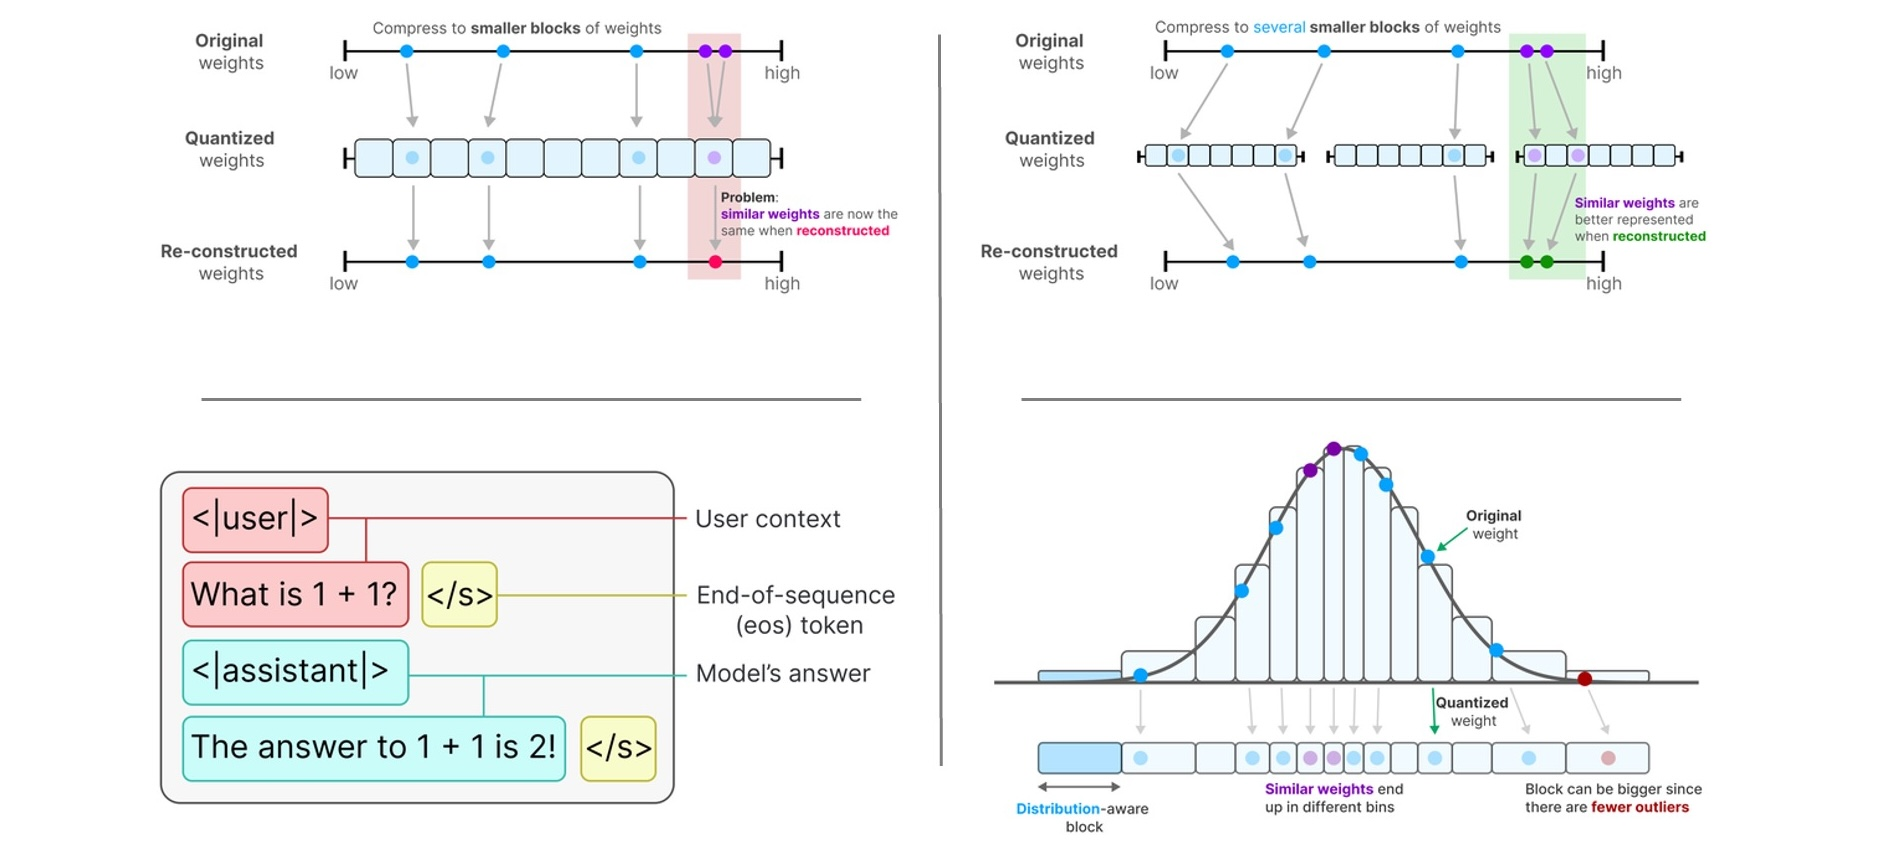

In [1]:
!pip install -q accelerate -U
!pip install -q bitsandbytes -U
!pip install -q trl -U
!pip install -q peft -U
!pip install -q transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 kB 968.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 421.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 770.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 111.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 414.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 244.1 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that

In [9]:
from datasets import load_dataset

dataset = load_dataset("HuggingFaceH4/ultrachat_200k", trust_remote_code=True, split="train_sft")
dataset = dataset.shuffle(seed=0).select(range(10_000))

In [17]:
from transformers import AutoTokenizer

template_tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")

def format_prompt(example):
  """Format the prompt using the <|user|> and <|assistant|> format"""
  chat = example['messages']
  prompt = template_tokenizer.apply_chat_template(chat, tokenize=False)

  return {'text': prompt}

# print(format_prompt(dataset[0])['text'])
dataset = dataset.map(format_prompt)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

### Testing Base LLAMA Model
- Let's see how base Tiny-LLAMA performs out of the box

In [ ]:
from transformers import pipeline

# base model
model_name = "TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T"

pipe = pipeline(task='text-generation', model=model_name, device='cuda')


# prompt
# <|user|>, <|assistant|>

prompt = """<|user|>
Tell me something about Large Language Models.</s>
<|assistant|>
"""

prompt = """
Tell me something about Large Language Models
"""

output = pipe(prompt)
output

## Model Configuration for Training

In [21]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig



In [22]:
# do the  4-bit quantization configuration in Q-LORA
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype='float16',
    bnb_4bit_use_double_quant=True
)

In [23]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = "<PAD>"
tokenizer.padding_size="left"

In [24]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map = "auto",
    quantization_config=bnb_config
)

In [26]:
model.config.use_cache=False
model.config.pretraining_tp=1

# Prepare LoRA Configuration for PEFT Fine tuning


In [28]:
from peft import LoraConfig, prepare_model_for_kbit_training, get_peft_model

peft_config = LoraConfig(
    lora_alpha=32,
    lora_dropout=0.1,
    r=64,
    bias='none',
    task_type='CAUSAL_LM',
    target_modules=['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']
)

model = prepare_model_for_kbit_training(model)

model = get_peft_model(model, peft_config)

In [31]:
w = 2048*256
a = 2048*64
b = 64*256

w, a, b, a+b, (a+b)/w

(524288, 131072, 16384, 147456, 0.28125)

## Model Fine Tuning

In [ ]:
from transformers import TrainingArguments, Trainer
from trl import SFTTrainer

output_dir = "train_dir"

args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    optim="paged_adamw_32bit",
    learning_rate=2e-4,
    lr_scheduler_type="cosine",
    num_train_epochs=1,
    logging_steps=10,
    fp16=True,
    gradient_checkpointing=True
)

trainer = SFTTrainer(
    model=model,
    train_dataset = dataset,
    dataset_text_field='text',
    tokenizer = tokenizer,
    args=args,
    max_seq_length=512,
    peft_config = peft_config
)

trainer.train()

In [33]:
trainer.model.save_pretrained("TinyLlama-1.1B-qlora")

## Load Pre-Trained PEFT Model for Prediction

In [34]:
from peft import AutoPeftModelForCausalLM

model = AutoPeftModelForCausalLM.from_pretrained(
    "TinyLlama-1.1B-qlora",
    device_map='auto'
)

merged_model = model.merge_and_unload()

In [42]:
from transformers import pipeline

prompt = """<|user|>
Tell me something about Large Language Models.</s>
<|assistant|>
"""

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = "<PAD>"
tokenizer.padding_size="left"

pipe = pipeline(task='text-generation', model=merged_model, tokenizer=tokenizer)
output = pipe(prompt)
print(output[0]['generated_text'])

<|user|>
Tell me something about Large Language Models.</s>
<|assistant|>
Large Language Models (LLMs) are a type of artificial intelligence (AI) that can generate human-like language. They are trained on large amounts of text data, such as Wikipedia articles, to create a model that can generate natural-sounding sentences.

LLMs are becoming increasingly popular in various fields, including natural language processing (NLP), machine translation, and chatbots. They are used to generate text in a variety of languages, including English, French, German, and Spanish.

One of the key advantages of LLMs is their ability to generate natural-sounding sentences that are similar to human language. This is achieved through the use of deep learning algorithms that learn to recognize patterns in text data and generate sentences that are similar to human language.

Another advantage of LLMs is their ability to handle complex language tasks, such as machine translation, where human translators strugg

In [40]:
!zip -r tiny_llama_qlora_adapter.zip TinyLlama-1.1B-qlora

  adding: TinyLlama-1.1B-qlora/ (stored 0%)
  adding: TinyLlama-1.1B-qlora/adapter_config.json (deflated 54%)
  adding: TinyLlama-1.1B-qlora/README.md (deflated 66%)
  adding: TinyLlama-1.1B-qlora/adapter_model.safetensors (deflated 8%)
